  “Machine Learning is defined as the study of computer programs that leverage algorithms and statistical models to learn through inference and patterns without being explicitly programed. Machine Learning field has undergone significant developments in the last decade.”
   
  Supervised learning is one of the most basic types of machine learning. In this type, the machine learning algorithm is trained on labeled data. Even though the data needs to be labeled accurately for this method to work, supervised learning is extremely powerful when used in the right circumstances.
In supervised learning, the ML algorithm is given a small training dataset to work with. This training dataset is a smaller part of the bigger dataset and serves to give the algorithm a basic idea of the problem, solution, and data points to be dealt with. The training dataset is also very similar to the final dataset in its characteristics and provides the algorithm with the labeled parameters required for the problem.

Unsupervised machine learning holds the advantage of being able to work with unlabeled data. This means that human labor is not required to make the dataset machine-readable, allowing much larger datasets to be worked on by the program.
In supervised learning, the labels allow the algorithm to find the exact nature of the relationship between any two data points. However, unsupervised learning does not have labels to work off of, resulting in the creation of hidden structures. Relationships between data points are perceived by the algorithm in an abstract manner, with no input required from human beings.The creation of these hidden structures is what makes unsupervised learning algorithms versatile. Instead of a defined and set problem statement, unsupervised learning algorithms can adapt to the data by dynamically changing hidden structures. This offers more post-deployment development than supervised learning algorithms.

 Reinforcement learning directly takes inspiration from how human beings learn from data in their lives. It features an algorithm that improves upon itself and learns from new situations using a trial-and-error method. Favorable outputs are encouraged or ‘reinforced’, and non-favorable outputs are discouraged or ‘punished’.
Based on the psychological concept of conditioning, reinforcement learning works by putting the algorithm in a work environment with an interpreter and a reward system. In every iteration of the algorithm, the output result is given to the interpreter, which decides whether the outcome is favorable or not.

Neural networks A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[181,80,44],[177,90,43],[198,70,54],[182,79,43],[199,69,32],[175,75,43],[200,88,50],[188,52,10],[195,99,52],[185,59,32]], 
                  columns=[['Height', 'Weight', 'Shoe_size']])
df['Gender'] = np.array(('male','female','female','male','female','male','male','female','male','female'))
df

,Height,Weight,Shoe_size,Gender
0,181,80,44,male
1,177,90,43,female
2,198,70,54,female
3,182,79,43,male
4,199,69,32,female
5,175,75,43,male
6,200,88,50,male
7,188,52,10,female
8,195,99,52,male
9,185,59,32,female


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


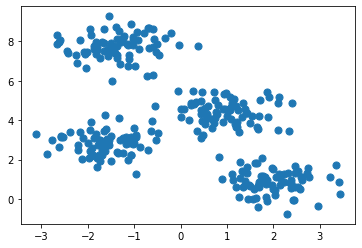

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


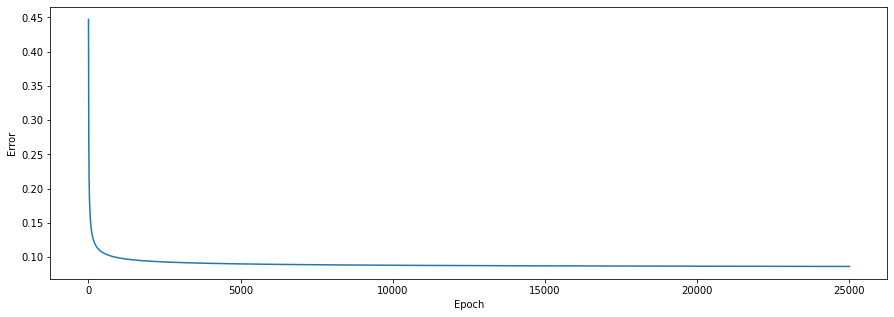

In [13]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()